In [6]:
import sys
sys.path.append('/Users/ashwingirish/Documents/Project_AreaLaw/inspiral_analysis/inspiral_analysis')
import dill
import utils

/Users/ashwingirish/miniconda3/envs/igwn-py310/lib/python3.10/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
/Users/ashwingirish/miniconda3/envs/igwn-py310/lib/python3.10/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package o

lal.MSUN_SI != Msun


In [9]:
filename = '/Users/ashwingirish/Documents/Project_AreaLaw/inspiral_analysis_akashmishra/data_files/job_files/area_law.save'
with open(filename, 'rb') as f:
    checkpoint = dill.load(f)

In [8]:
checkpoint.keys()

dict_keys(['sampler', 'version', 'format_version'])

In [10]:
from dynesty import NestedSampler
sampler = NestedSampler.restore(filename)

In [12]:
dir(sampler)

['M',
 '_PROPOSE',
 '_UPDATE',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fill_queue',
 '_get_point_value',
 '_new_point',
 '_remove_live_points',
 'add_final_live',
 'add_live_points',
 'added_live',
 'blob',
 'bootstrap',
 'bound',
 'bound_update_interval',
 'bounding',
 'citations',
 'cite',
 'compute_jac',
 'custom_update',
 'dlv',
 'eff',
 'enlarge',
 'evolve_point',
 'facc',
 'first_bound_update_eff',
 'first_bound_update_ncall',
 'fmove',
 'grad',
 'hslice_history',
 'it',
 'kwargs',
 'live_blobs',
 'live_bound',
 'live_it',
 'live_logl',
 'live_u',
 'live_v',
 'logl_first_update',
 'loglikelihood',
 'logvol_init',
 'max_

In [18]:
import numpy as np
from dynesty.utils import resample_equal
results = sampler.results
# Convert log-weights to normalized weights
logwt = results.logwt  # log-weights
logz = results.logz[-1]  # log-evidence
weights = np.exp(logwt - logz)  # normalized weights

# Resample into equal-weight posterior samples
posterior_samples = resample_equal(results.samples, weights)

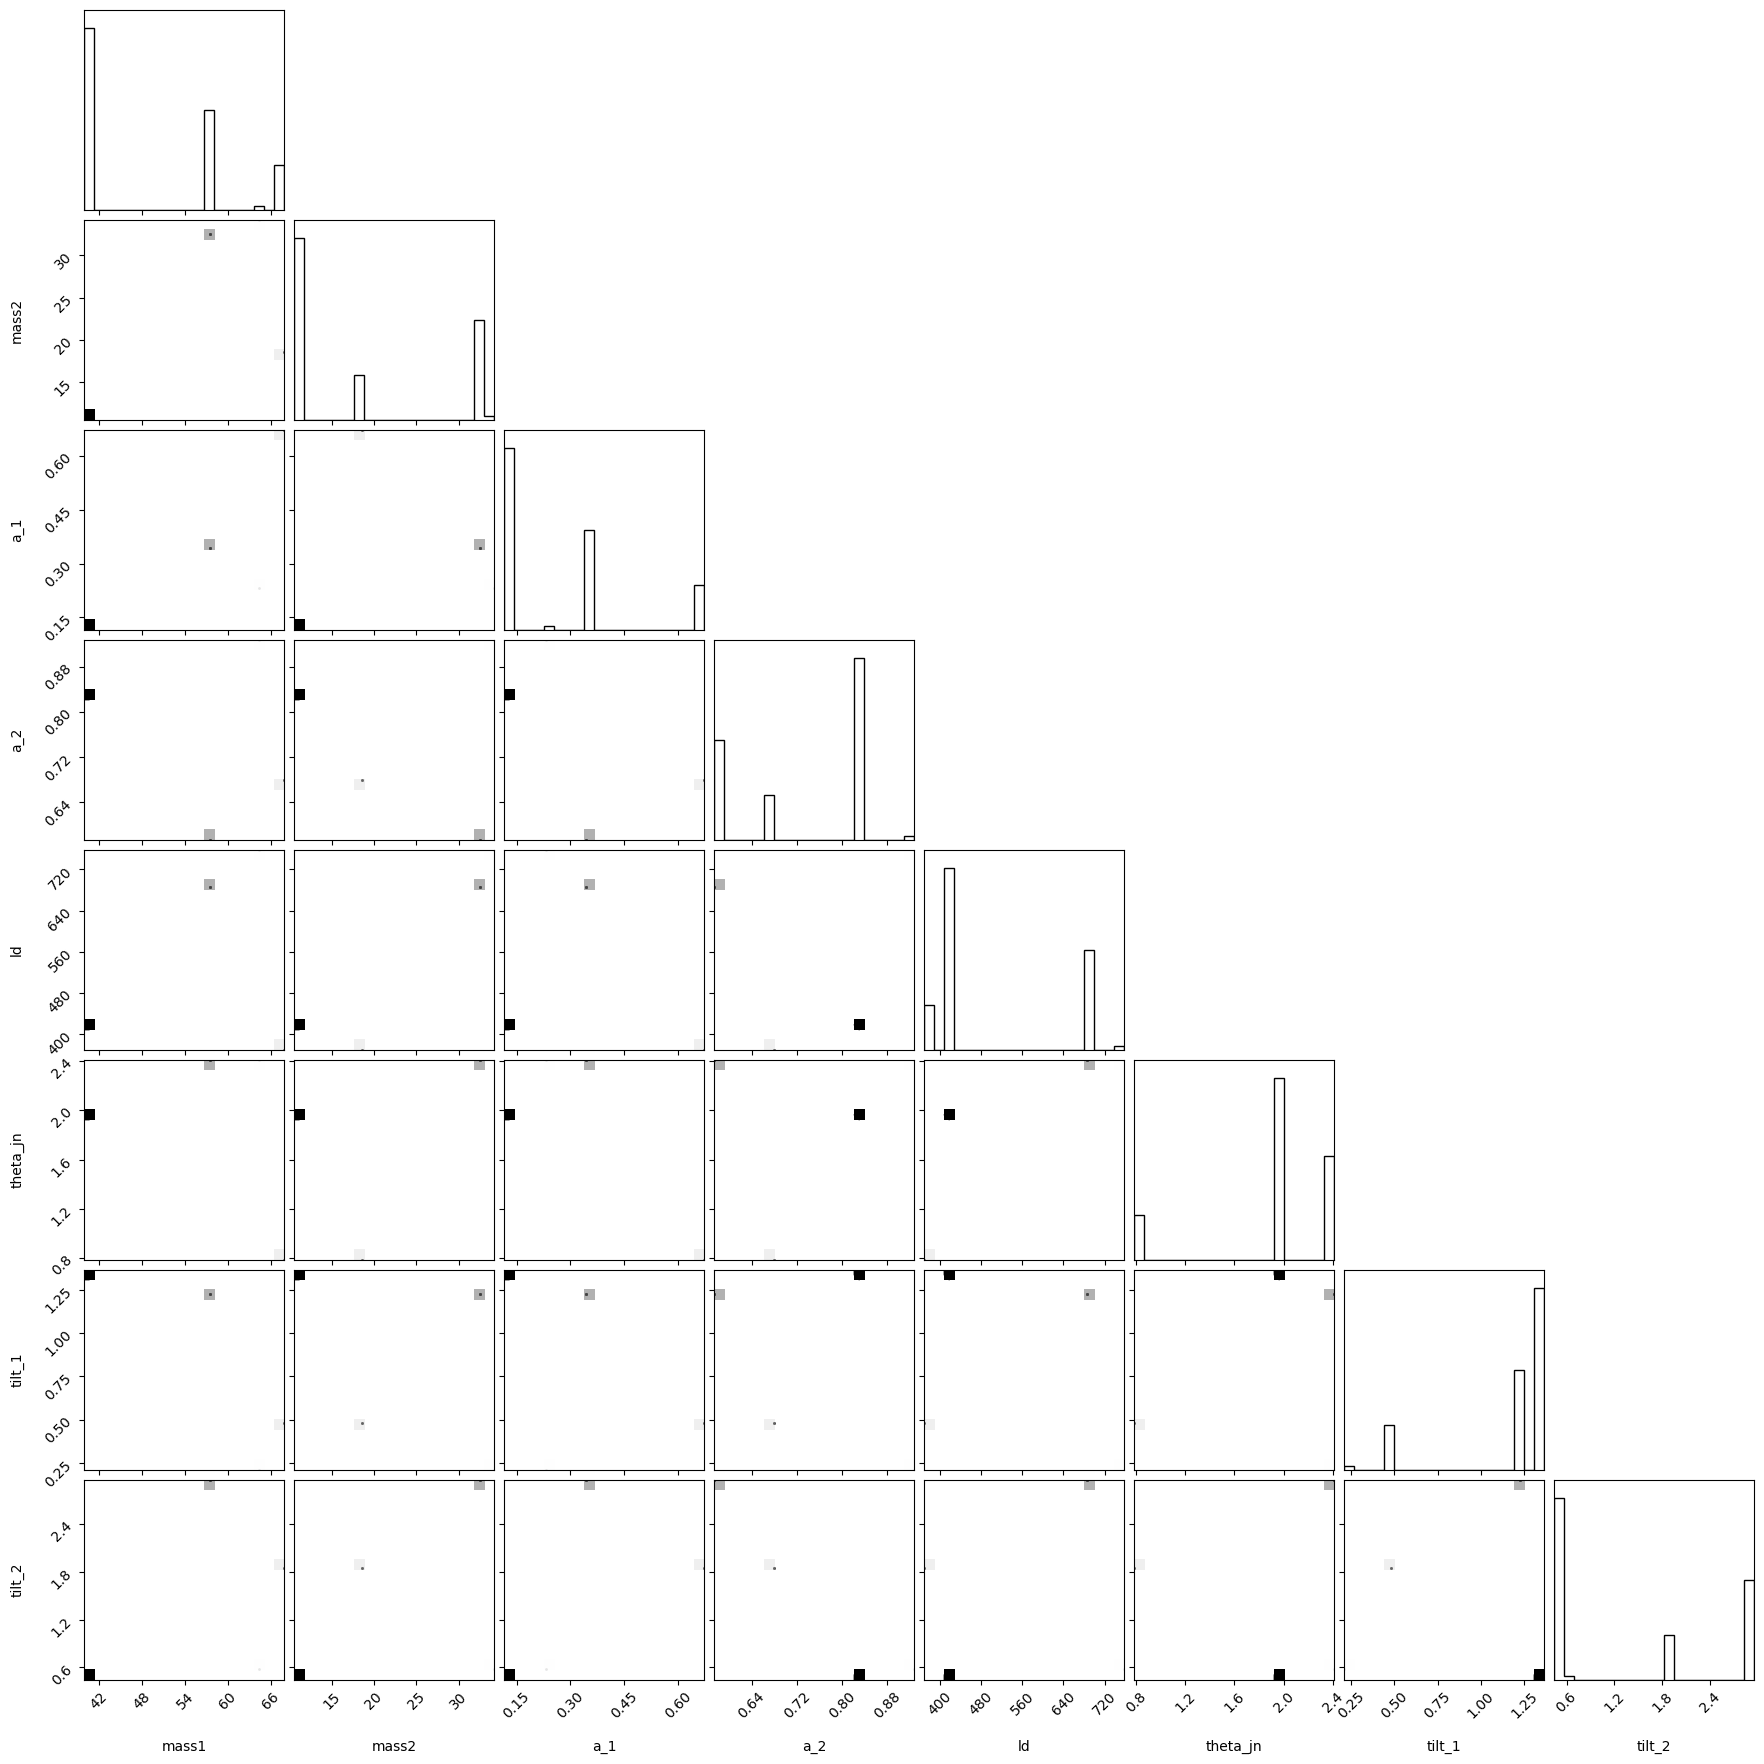

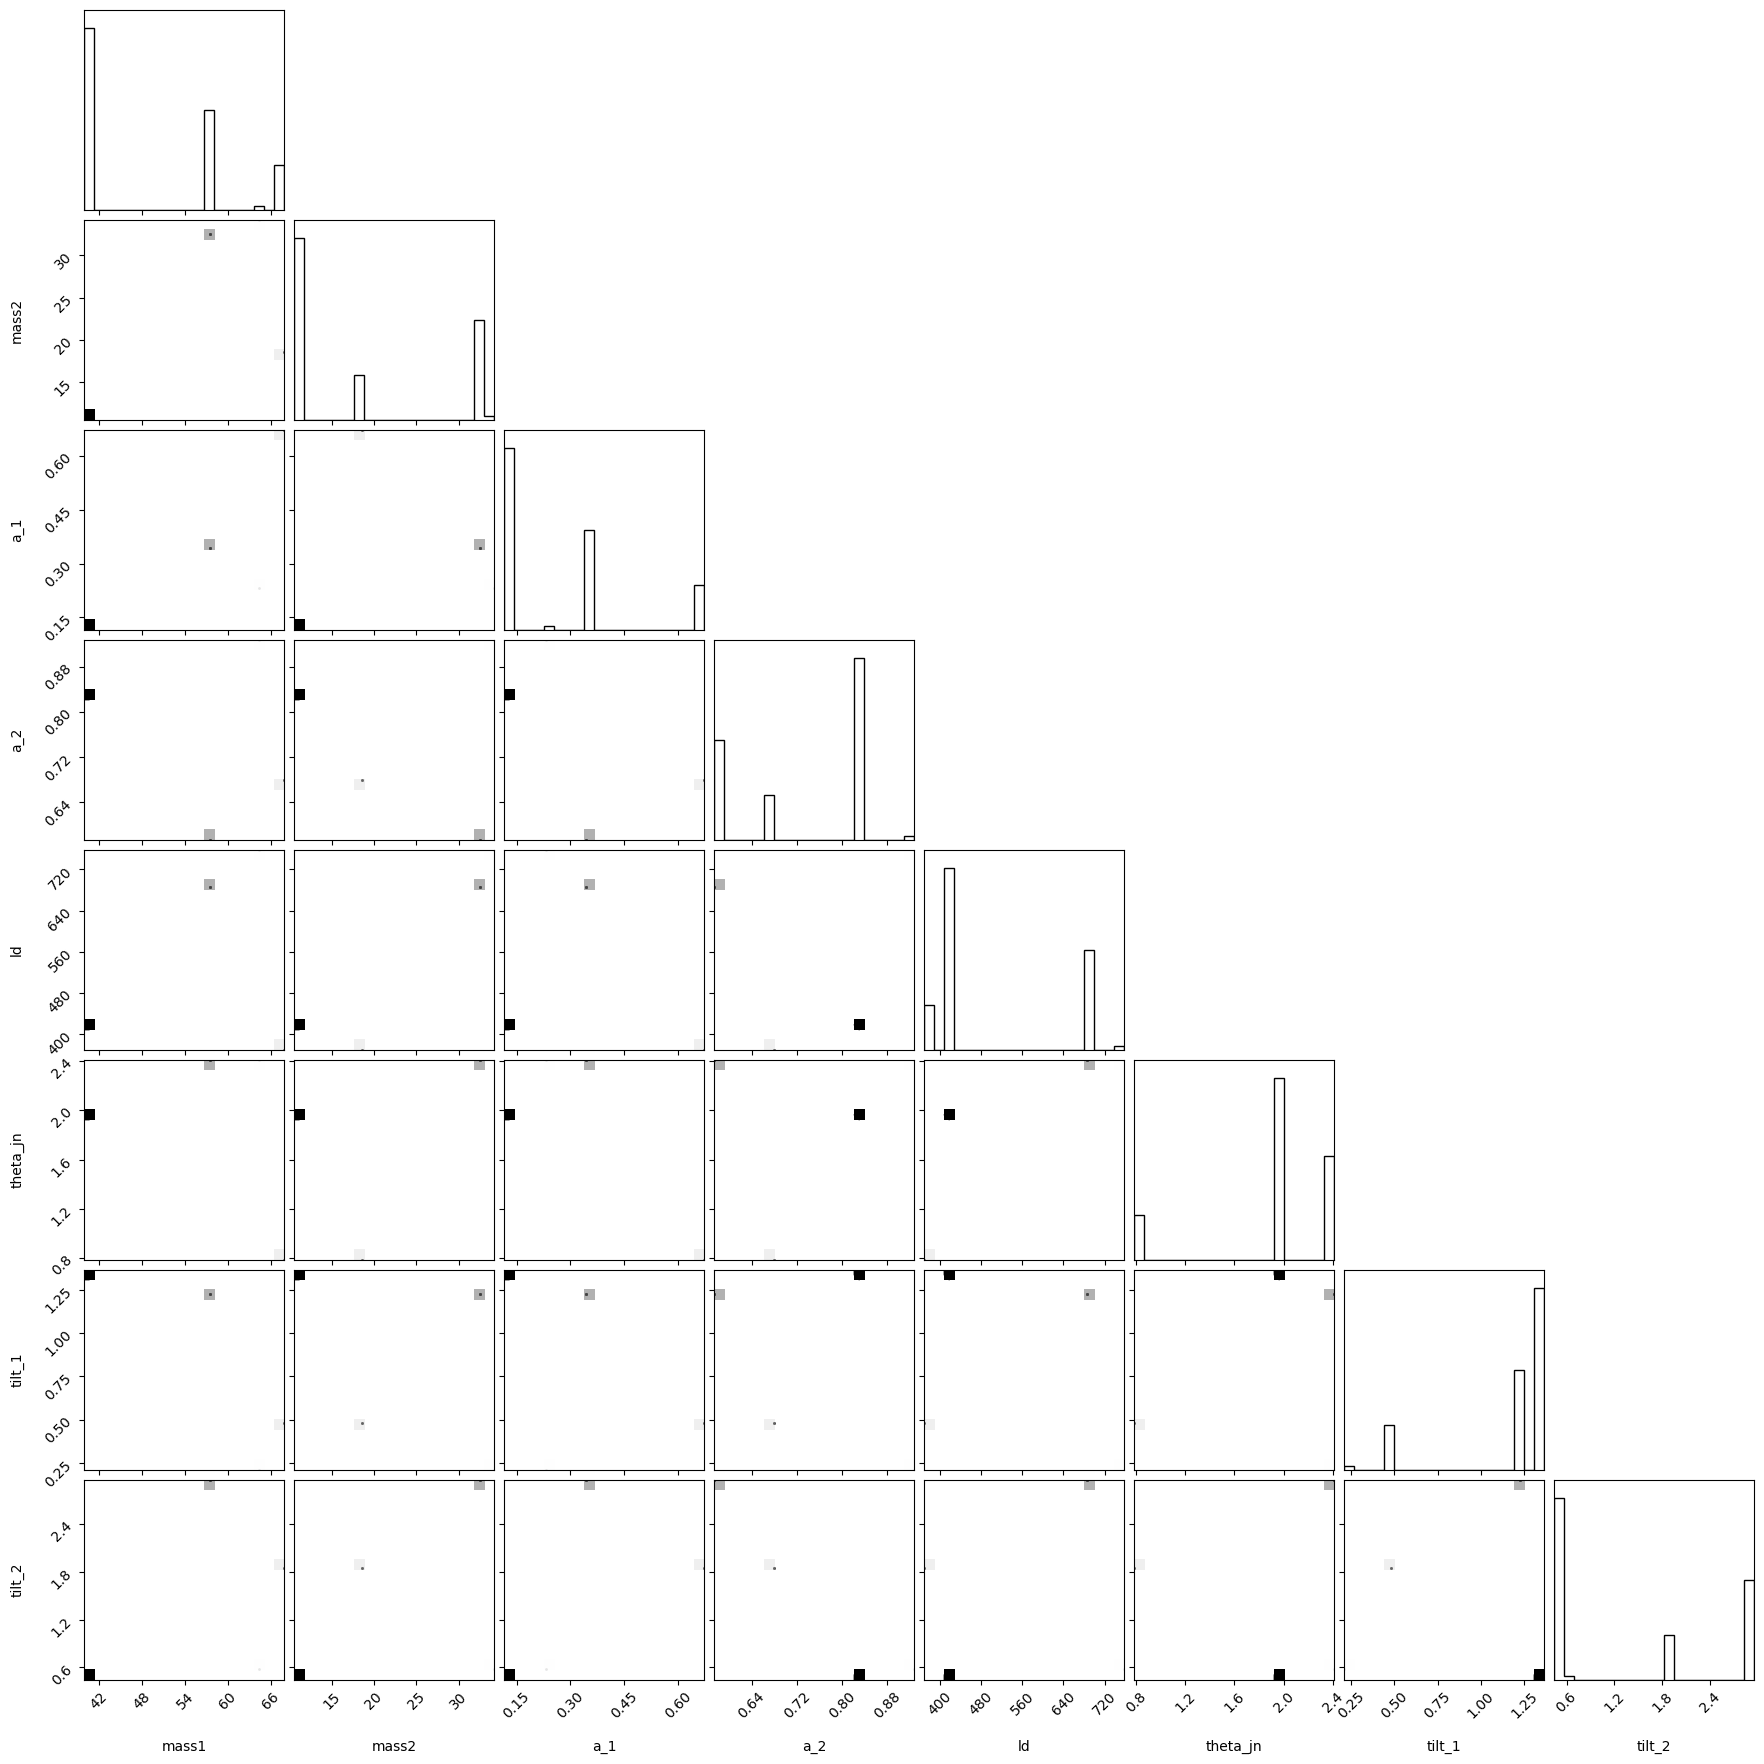

In [19]:
import corner
corner.corner(posterior_samples, labels=[
    "mass1", "mass2", "a_1", "a_2", "ld", "theta_jn", "tilt_1", "tilt_2"
])